In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

file_path = 'C:/Users/moura/PAD_JOB/data_extracted/New-dataset-SVCpredictions.csv'
dataset = pd.read_csv(file_path)

dataset.head()

,title,text,sentiment,stars,likesCount,reviewerPhotoUrl,publishedAtDate,name,predictions
0,BOB'S,Shake e Sunday aguados. Horrível. Não recomendo.,negative,1,1,https://lh3.googleusercontent.com/a-/AD_cMMRso...,2021-04-03 20:10:01.702000+00:00,Sílvio Brito,negative
1,BOB'S,Credo!,negative,1,0,https://lh3.googleusercontent.com/a-/AD_cMMS7i...,2019-05-25 21:11:05.280000+00:00,Tiago de Bem,negative
2,BOB'S,"Desorganizado, pedido veio errado",negative,1,0,https://lh3.googleusercontent.com/a-/AD_cMMQP2...,2020-02-15 23:29:17.166000+00:00,paulo aecio alves,negative
3,BOB'S,Atendimento péssimo,negative,1,0,https://lh3.googleusercontent.com/a-/AD_cMMSwu...,2018-10-18 10:25:35.416000+00:00,Eryka Ferreira Menezes de Paula,negative
4,BOB'S,"Todos atendentes de mal humor e sem educação, ...",negative,1,2,https://lh3.googleusercontent.com/a-/AD_cMMS_z...,2022-01-15 18:37:15.511000+00:00,João Benuto,negative


In [27]:
# Criando colunas separadas para sentimentos positivos e negativos
dataset['positive'] = (dataset['predictions'] == 'positive').astype(int)
dataset['negative'] = (dataset['predictions'] == 'negative').astype(int)

# Exibindo as primeiras linhas para verificar as novas colunas
dataset[['predictions', 'positive', 'negative']].head()

,predictions,positive,negative
0,negative,0,1
1,negative,0,1
2,negative,0,1
3,negative,0,1
4,negative,0,1


In [28]:
# Identificando os empreendimentos únicos no conjunto de dados
unique_titles = dataset['title'].unique()
unique_titles, len(unique_titles)


(array(["BOB'S", 'Açaí', 'SUBWAY', 'Subway', 'Burguer', 'Dom Zé',
        'Flambas', 'Spoleto', 'X Mania', 'Casa Max', 'DomDella',
        'Giraffas', 'Griletto', 'Yan Ping', 'Bom Prato', 'Bom Sabor',
        'Charllesn', 'Dog Mania', 'Gyn Grill', 'LP Burger', 'Limas Bar',
        'MADRE MIA', "Paraiba's", 'Pato Roco', 'Alpha Pane', 'Ball Hamom',
        'Dekki Japa', 'Fast Açai', 'Lanchonete', 'MAPSBURGER',
        'Mau Nenhum', "McDonald's", 'Peixe Vivo', 'Primo Rico',
        'Sandubãoo', 'BURGUE BANG', 'Big Burguer', 'Chef Burggs',
        'City Burger', 'Deck Maione', 'FAST AÇAÍ', 'LC Salgados',
        'Limas bar 2', 'Marifit_gyn', 'Maxt Burger', 'Neo burguer',
        'Quintal Bar', 'Rancho Pite', 'Restaurante', 'Sabor e Cia',
        'TK Marmitex', 'Wil Burguer', 'Wn& eventos', 'X Na Praça',
        '6 Pira Açai', 'Armazémm 73', 'Bar do Sousa', 'Bem Feitinho',
        "Bob's Shakes", 'Cheff Burger', 'Cia do caldo', "Dalla's Food",
        'Fim De Tarde', 'Guga burguer', 'Jantin

In [29]:
# Recarregando o conjunto de dados
data = pd.read_csv(file_path)

# Criando colunas separadas para sentimentos positivos e negativos
data['positive'] = (data['predictions'] == 'positive').astype(int)
data['negative'] = (data['predictions'] == 'negative').astype(int)

# Identificando os empreendimentos únicos no conjunto de dados
unique_titles = data['title'].unique()
unique_titles, len(unique_titles)


(array(["BOB'S", 'Açaí', 'SUBWAY', 'Subway', 'Burguer', 'Dom Zé',
        'Flambas', 'Spoleto', 'X Mania', 'Casa Max', 'DomDella',
        'Giraffas', 'Griletto', 'Yan Ping', 'Bom Prato', 'Bom Sabor',
        'Charllesn', 'Dog Mania', 'Gyn Grill', 'LP Burger', 'Limas Bar',
        'MADRE MIA', "Paraiba's", 'Pato Roco', 'Alpha Pane', 'Ball Hamom',
        'Dekki Japa', 'Fast Açai', 'Lanchonete', 'MAPSBURGER',
        'Mau Nenhum', "McDonald's", 'Peixe Vivo', 'Primo Rico',
        'Sandubãoo', 'BURGUE BANG', 'Big Burguer', 'Chef Burggs',
        'City Burger', 'Deck Maione', 'FAST AÇAÍ', 'LC Salgados',
        'Limas bar 2', 'Marifit_gyn', 'Maxt Burger', 'Neo burguer',
        'Quintal Bar', 'Rancho Pite', 'Restaurante', 'Sabor e Cia',
        'TK Marmitex', 'Wil Burguer', 'Wn& eventos', 'X Na Praça',
        '6 Pira Açai', 'Armazémm 73', 'Bar do Sousa', 'Bem Feitinho',
        "Bob's Shakes", 'Cheff Burger', 'Cia do caldo', "Dalla's Food",
        'Fim De Tarde', 'Guga burguer', 'Jantin

In [30]:
# Separando as revisões positivas e negativas por empreendimento
positive_reviews = data[data['predictions'] == 'positive']
negative_reviews = data[data['predictions'] == 'negative']

# Agrupando as revisões positivas e negativas por título (empreendimento) e concatenando os textos
positive_reviews_grouped = positive_reviews.groupby('title')['text'].apply(' '.join).reset_index()
negative_reviews_grouped = negative_reviews.groupby('title')['text'].apply(' '.join).reset_index()

# Exibindo as primeiras linhas dos agrupamentos
positive_reviews_grouped.head(), negative_reviews_grouped.head()


(                                               title  \
 0                        20 Buscar Bar e Restaurante   
 1  597 Burger (Hambúrguer, Batata frita, Cerveja)...   
 2                                        6 Pira Açai   
 3                       A GRANDE FAMÍLIA RESTAURANTE   
 4                         ABSOLUTO BAR & RESTAURANTE   
 
                                                 text  
 0  Muito bom mesmo Intermediário. Tudo muito bom,...  
 1  Bom Hambúrguer e até gostoso. Mais são caros e...  
 2  Excelente, atendimento, produto , açaí maravil...  
 3  Comida boa. Uma comida deliciosa!\r\nSabe aque...  
 4  Jantinha perfeita e com excelente preço. O ate...  ,
                                                title  \
 0                        20 Buscar Bar e Restaurante   
 1  597 Burger (Hambúrguer, Batata frita, Cerveja)...   
 2                                        6 Pira Açai   
 3                       A GRANDE FAMÍLIA RESTAURANTE   
 4                         ABSOLUT

In [31]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Baixando as stopwords, se ainda não estiverem baixadas
nltk.download('stopwords')
nltk.download('punkt')

# Função para calcular as palavras mais frequentes
def get_most_common_words(text, n=10):
    # Tokenizando o texto
    words = word_tokenize(text.lower())
    
    # Removendo stopwords e caracteres não alfabéticos
    filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('portuguese')]
    
    # Calculando a frequência das palavras
    word_freq = Counter(filtered_words)
    
    # Retornando as n palavras mais comuns
    return word_freq.most_common(n)


#selecione o empreendimento
first_title = positive_reviews_grouped.iloc[0]['title']

# Selecionando o texto positivo e negativo para o primeiro empreendimento
positive_text = positive_reviews_grouped.iloc[0]['text']
negative_text = negative_reviews_grouped.iloc[0]['text']

# Obtendo as palavras mais frequentes para pontos fortes e fracos
positive_common_words = get_most_common_words(positive_text)
negative_common_words = get_most_common_words(negative_text)

first_title, positive_common_words, negative_common_words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('20 Buscar Bar e Restaurante',
 [('bom', 29),
  ('ótimo', 21),
  ('atendimento', 18),
  ('cerveja', 17),
  ('gelada', 15),
  ('melhor', 10),
  ('bem', 9),
  ('boa', 9),
  ('bar', 9),
  ('lugar', 9)],
 [('atendimento', 20),
  ('lugar', 15),
  ('bar', 13),
  ('cerveja', 13),
  ('comida', 12),
  ('mal', 11),
  ('gelada', 10),
  ('dono', 9),
  ('boa', 9),
  ('péssimo', 9)])

In [32]:
# Função simplificada para calcular as palavras mais frequentes sem remover stopwords
def get_most_common_words_simple(text, n=10):
    # Tokenizando o texto por espaços
    words = text.lower().split()
    
    # Removendo caracteres não alfabéticos
    filtered_words = [word.strip('.,!?;()[]{}"\'') for word in words if word.isalpha()]
    
    # Calculando a frequência das palavras
    word_freq = Counter(filtered_words)
    
    # Retornando as n palavras mais comuns
    return word_freq.most_common(n)

# Obtendo as palavras mais frequentes para pontos fortes e fracos (versão simplificada)
positive_common_words_simple = get_most_common_words_simple(positive_text)
negative_common_words_simple = get_most_common_words_simple(negative_text)

first_title, positive_common_words_simple, negative_common_words_simple


('20 Buscar Bar e Restaurante',
 [('e', 28),
  ('de', 27),
  ('muito', 20),
  ('bom', 18),
  ('ótimo', 18),
  ('cerveja', 17),
  ('atendimento', 14),
  ('com', 13),
  ('do', 12),
  ('gelada', 10)],
 [('e', 45),
  ('de', 35),
  ('a', 31),
  ('o', 28),
  ('não', 27),
  ('é', 25),
  ('muito', 22),
  ('que', 22),
  ('um', 17),
  ('atendimento', 16)])

Palavras recorrentes

In [46]:
# Lista manual de stopwords em português
stopwords_portuguese = [
    "a", "ao", "aos", "aquela", "aquelas", "aquele", "aqueles", "aquilo", "as", "até", "com", "como", "da", "das", "de",
    "dela", "delas", "dele", "deles", "depois", "do", "dos", "e", "ela", "elas", "ele", "eles", "em", "entre", "era",
    "eram", "essa", "essas", "esse", "esses", "esta", "estas", "este", "estes", "eu", "isso", "isto", "já", "mais", "mas",
    "me", "mesmo", "mim", "minha", "minhas", "na", "nas", "nem", "no", "nos", "nós", "o", "os", "ou", "para", "pela",
    "pelas", "pelo", "pelos", "por", "qual", "quando", "que", "se", "sem", "ser", "seu", "seus", "sua", "suas", "só",
    "um", "uma", "você", "vocês", "é", "que", "um", "não", "tem", "bem", "bom", "boa", "ótimo", "melhor", "muito", "fui"
]

# Função atualizada para calcular as palavras mais frequentes, removendo stopwords manuais
def get_most_common_words_updated(text, n=10):
    # Tokenizando o texto por espaços
    words = text.lower().split()
    
    # Removendo stopwords manuais e caracteres não alfabéticos
    filtered_words = [word.strip('.,!?;()[]{}"\'') for word in words if word.isalpha() and word not in stopwords_portuguese]
    
    # Calculando a frequência das palavras
    word_freq = Counter(filtered_words)
    
    # Retornando as n palavras mais comuns
    return word_freq.most_common(n)

# Obtendo as palavras mais frequentes para pontos fortes e fracos (versão atualizada)
positive_common_words_updated = get_most_common_words_updated(positive_text)
negative_common_words_updated = get_most_common_words_updated(negative_text)

first_title, positive_common_words_updated, negative_common_words_updated


('20 Buscar Bar e Restaurante',
 [('cerveja', 17),
  ('atendimento', 14),
  ('gelada', 10),
  ('bar', 9),
  ('gosto', 8),
  ('lugar', 7),
  ('tira', 6),
  ('local', 6),
  ('comida', 6),
  ('centro', 6)],
 [('atendimento', 16),
  ('bar', 13),
  ('cerveja', 12),
  ('mal', 11),
  ('lugar', 10),
  ('comida', 10),
  ('péssimo', 9),
  ('dono', 8),
  ('gelada', 6),
  ('preço', 5)])

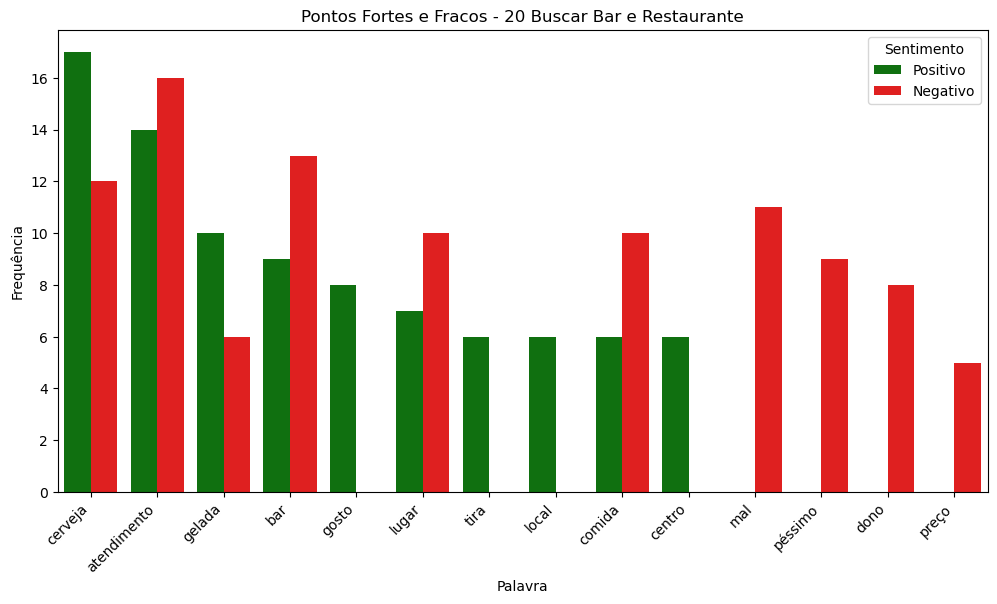

In [47]:
# Convertendo as palavras mais comuns em DataFrames com uma coluna adicional para o sentimento
positive_df_20_buscar = pd.DataFrame(positive_common_words_updated, columns=['Palavra', 'Frequência'])
positive_df_20_buscar['Sentimento'] = 'Positivo'

negative_df_20_buscar = pd.DataFrame(negative_common_words_updated, columns=['Palavra', 'Frequência'])
negative_df_20_buscar['Sentimento'] = 'Negativo'

# Combinando os DataFrames
combined_df_20_buscar = pd.concat([positive_df_20_buscar, negative_df_20_buscar])



# Plotando o histograma usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Palavra', y='Frequência', hue='Sentimento', data=combined_df_20_buscar, palette=['green', 'red'])
plt.xticks(rotation=45, ha='right')
plt.title('Pontos Fortes e Fracos - 20 Buscar Bar e Restaurante')
plt.show()


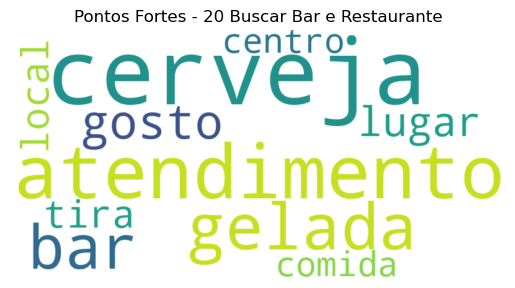

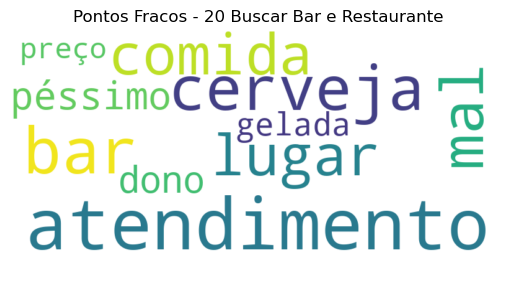

In [48]:
from wordcloud import WordCloud

# Função para criar uma nuvem de palavras a partir das palavras mais comuns
def create_word_cloud(common_words, title, stopwords=None):
    word_freq = dict(common_words)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords
    ).generate_from_frequencies(word_freq)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Criando uma nuvem de palavras para os pontos fortes
create_word_cloud(positive_common_words_updated, 'Pontos Fortes - ' + first_title, stopwords_portuguese)

# Criando uma nuvem de palavras para os pontos fracos
create_word_cloud(negative_common_words_updated, 'Pontos Fracos - ' + first_title, stopwords_portuguese)


In [36]:
# Filtrando as revisões para o empreendimento "20 Buscar Bar e Restaurante"
reviews_20_buscar = data[data['title'] == first_title]

# Contando o número de revisões positivas e negativas
positive_count_20_buscar = reviews_20_buscar[reviews_20_buscar['predictions'] == 'positive'].shape[0]
negative_count_20_buscar = reviews_20_buscar[reviews_20_buscar['predictions'] == 'negative'].shape[0]

positive_count_20_buscar, negative_count_20_buscar


(113, 71)

In [37]:
# Filtrando as revisões para o empreendimento "20 Buscar Bar e Restaurante"
reviews_20_buscar = data[data['title'] == '20 Buscar Bar e Restaurante']

# Exibindo as primeiras linhas para confirmação
reviews_20_buscar.head()


,title,text,sentiment,stars,likesCount,reviewerPhotoUrl,publishedAtDate,name,predictions,positive,negative
62423,20 Buscar Bar e Restaurante,Povo muito mal educado,negative,1,1,https://lh3.googleusercontent.com/a-/AD_cMMSA4...,2020-04-29 23:11:35.474000+00:00,Charles Maynks Cardoso,negative,0,1
62424,20 Buscar Bar e Restaurante,"O dono do estabelecimento e um grosso,nao tem ...",negative,1,1,https://lh3.googleusercontent.com/a-/AD_cMMRW9...,2019-09-26 12:48:51.479000+00:00,Lucimar tobin,negative,0,1
62425,20 Buscar Bar e Restaurante,Mal atendimento.,negative,1,1,https://lh3.googleusercontent.com/a-/AD_cMMS1t...,2017-02-07 20:57:55.954000+00:00,Marquinho Faria,negative,0,1
62426,20 Buscar Bar e Restaurante,"A comida é boa, mas vem muito pouca por um pre...",negative,1,0,https://lh3.googleusercontent.com/a-/AD_cMMSgj...,2022-07-11 02:16:07.668000+00:00,vitor,negative,0,1
62427,20 Buscar Bar e Restaurante,"Decepcionante, não tinham troco , para meu co...",negative,1,3,https://lh3.googleusercontent.com/a-/AD_cMMSQv...,2018-12-06 19:05:05.883000+00:00,ROBERTO A DORNELAS,negative,0,1


Junior cozinha brasileira

In [40]:
# Filtrando as revisões para o empreendimento "20 Buscar Bar e Restaurante"
reviews_20_buscar = data[data['title'] == 'Júnior Cozinha Brasileira']

# Exibindo as primeiras linhas para confirmação
reviews_20_buscar.head()


,title,text,sentiment,stars,likesCount,reviewerPhotoUrl,publishedAtDate,name,predictions,positive,negative
52292,Júnior Cozinha Brasileira,"Ótimo, a comida é muito saborosa.\r\nO que vem...",negative,1,1,https://lh3.googleusercontent.com/a/AAcHTtf2Br...,2022-02-19 15:40:40.949000+00:00,Talles Lopes Constantino,positive,1,0
52293,Júnior Cozinha Brasileira,"Lugar extremamente cheio, comida igual do fome...",negative,1,1,https://lh3.googleusercontent.com/a-/AD_cMMRiy...,2021-10-03 19:42:27.797000+00:00,Vanessa Fg,negative,0,1
52294,Júnior Cozinha Brasileira,Muito cheio hoje fui embora desorganizado,negative,1,1,https://lh3.googleusercontent.com/a/AAcHTtfT-y...,2019-05-12 17:29:25.990000+00:00,elan pinto,negative,0,1
52295,Júnior Cozinha Brasileira,Pense num lugar bagunçado! Zero distanciamento...,negative,1,1,https://lh3.googleusercontent.com/a/AAcHTtfdnF...,2021-05-08 16:16:55.314000+00:00,Wagner Melo,negative,0,1
52296,Júnior Cozinha Brasileira,"Péssimo! Comida cara e cheia de óleo e sal, fa...",negative,1,1,https://lh3.googleusercontent.com/a-/AD_cMMQsZ...,2017-06-15 15:59:19.579000+00:00,Urufin Br,negative,0,1


Use Stopwords e personalise o estabelecimento

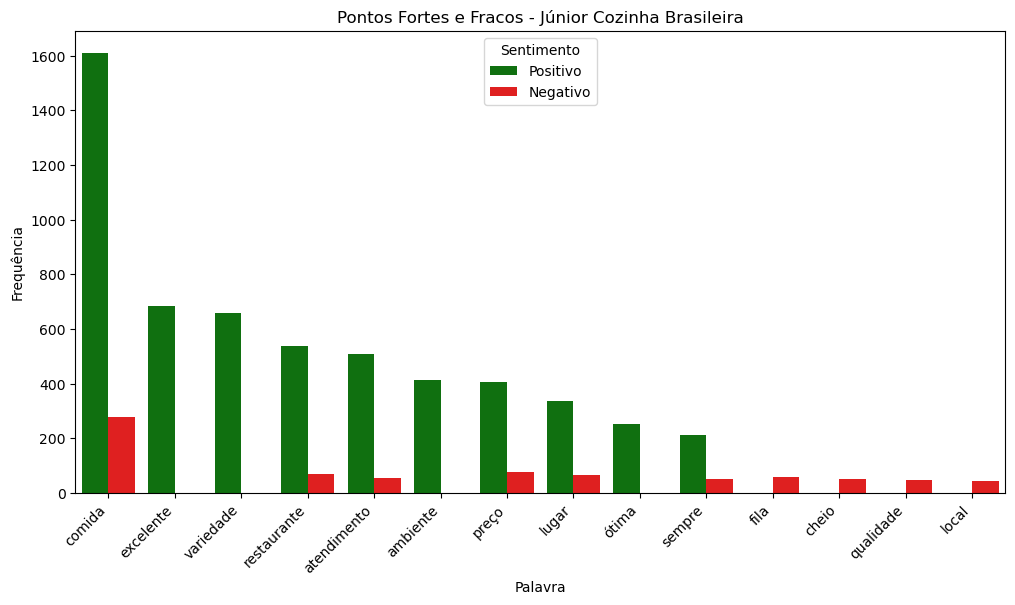

In [54]:
# Coloque o nome do estabelecimento
reviews_20_buscar = data[data['title'] == 'Júnior Cozinha Brasileira']

# Exibindo as primeiras linhas para confirmação
reviews_20_buscar.head()

# Lista manual de stopwords em português fornecida
stopwords_portuguese = [
    "a", "ao", "aos", "aquela", "aquelas", "aquele", "aqueles", "aquilo", "as", "até", "com", "como", "da", "das", "de",
    "dela", "delas", "dele", "deles", "depois", "do", "dos", "e", "ela", "elas", "ele", "eles", "em", "entre", "era",
    "eram", "essa", "essas", "esse", "esses", "esta", "estas", "este", "estes", "eu", "isso", "isto", "já", "mais", "mas",
    "me", "mesmo", "mim", "minha", "minhas", "na", "nas", "nem", "no", "nos", "nós", "o", "os", "ou", "para", "pela",
    "pelas", "pelo", "pelos", "por", "qual", "quando", "que", "se", "sem", "ser", "seu", "seus", "sua", "suas", "só",
    "um", "uma", "você", "vocês", "é", "que", "um", "não", "tem", "porém", "pra", "foi", "bem", "bom", "boa", "ótimo", "melhor", "muita", "muito"
]

# Utilizando a função atualizada com a lista manual de stopwords
positive_common_words = get_most_common_words_updated(positive_text_20_buscar)
negative_common_words = get_most_common_words_updated(negative_text_20_buscar)

# Convertendo as palavras mais comuns em DataFrames com uma coluna adicional para o sentimento
positive_df_20_buscar = pd.DataFrame(positive_common_words_20_buscar, columns=['Palavra', 'Frequência'])
positive_df_20_buscar['Sentimento'] = 'Positivo'

negative_df_20_buscar = pd.DataFrame(negative_common_words_20_buscar, columns=['Palavra', 'Frequência'])
negative_df_20_buscar['Sentimento'] = 'Negativo'

# Combinando os DataFrames
combined_df_20_buscar = pd.concat([positive_df_20_buscar, negative_df_20_buscar])

# Plotando o histograma usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Palavra', y='Frequência', hue='Sentimento', data=combined_df_20_buscar, palette=['green', 'red'])
plt.xticks(rotation=45, ha='right')
plt.title('Pontos Fortes e Fracos - Júnior Cozinha Brasileira')
plt.show()


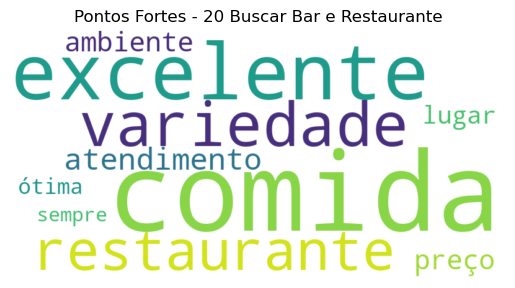

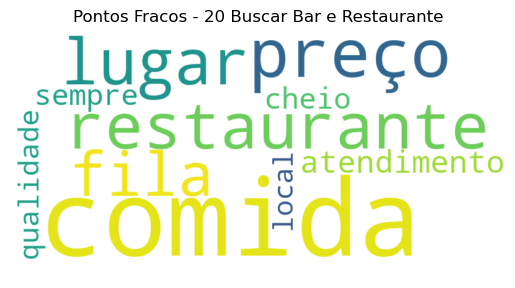

In [55]:
from wordcloud import WordCloud

# Função para criar uma nuvem de palavras a partir das palavras mais comuns
def create_word_cloud(common_words, title, stopwords=None):
    word_freq = dict(common_words)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords
    ).generate_from_frequencies(word_freq)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Criando uma nuvem de palavras para os pontos fortes
create_word_cloud(positive_common_words, 'Pontos Fortes - ' + first_title, stopwords_portuguese)

# Criando uma nuvem de palavras para os pontos fracos
create_word_cloud(negative_common_words, 'Pontos Fracos - ' + first_title, stopwords_portuguese)